Well this idea went pretty much nowhere

The model simply learned to generate a black image, as it was the closest way of getting the right results
It explains why all the accuracies tested generated approx the same avg.

In [1]:
import os
from lib.train_AI_lib import *
from lib.models.SemiSup import *
from lib.models.AutoEncoders import *

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


## Using auto encoder to semi-supervise

In [ ]:
batchsize=16; epoch=15; lr=0.01
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))

net = semiSupB(name='semiSupB', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

## Using auto encoder generatively (prob distribution)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncC('autEncC'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncC_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encC', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncD('autEncD'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encD', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encD', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

## Using the auto encoder generatively (full)
Since the above attempt at an autoencoder feeds in what is essentially a prob distribution into the CNN, attempting a different approach wherein i use the prediction to generate a mask to apply to the original images

In [ ]:
### Generate the images to use (commented out unless required)

In [ ]:
enc = autEncC('autEncC'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncC_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

In [ ]:
enc = autEncD('autEncD'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

In [ ]:
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

Epoch 0 | Time Taken: 95.47s | Training Error: 0.9853907962, Training loss: 40.3368597582 | Validation Error: 0.9883040936, Validation loss: 20.7826544203
Epoch 1 | Time Taken: 93.55s | Training Error: 0.9842951059, Training loss: 21.0870618460 | Validation Error: 0.9824561404, Validation loss: 20.8164920962
Epoch 2 | Time Taken: 93.93s | Training Error: 0.9868517166, Training loss: 21.1014672950 | Validation Error: 0.9883040936, Validation loss: 21.1326146430
Epoch 3 | Time Taken: 92.14s | Training Error: 0.9850255661, Training loss: 21.1047412472 | Validation Error: 0.9912280702, Validation loss: 20.8936510323
Epoch 4 | Time Taken: 93.50s | Training Error: 0.9799123448, Training loss: 21.2444086319 | Validation Error: 0.9824561404, Validation loss: 21.1871602693
Epoch 5 | Time Taken: 94.12s | Training Error: 0.9802775749, Training loss: 21.0933966219 | Validation Error: 0.9853801170, Validation loss: 21.4864413392
Epoch 6 | Time Taken: 92.11s | Training Error: 0.9802775749, Training 

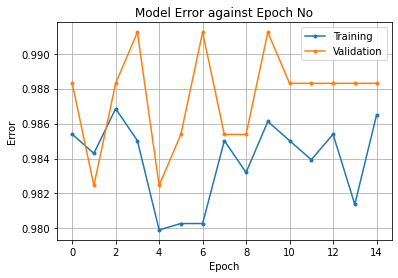

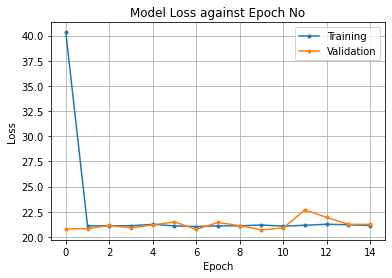

In [3]:
batchsize=16; epoch=15; lr=0.005
net = fullGenSemiA(name='fullGenSemiA_encC'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, inPath="saved/autEncMasked/autEncC")
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

Epoch 0 | Time Taken: 91.79s | Training Error: 0.9912344777, Training loss: 44.4174561273 | Validation Error: 0.9912280702, Validation loss: 20.7016591328
Epoch 1 | Time Taken: 91.16s | Training Error: 0.9813732652, Training loss: 20.8643250278 | Validation Error: 0.9736842105, Validation loss: 20.5678028817
Epoch 2 | Time Taken: 90.56s | Training Error: 0.9868517166, Training loss: 20.8766134000 | Validation Error: 0.9912280702, Validation loss: 20.8366816009
Epoch 3 | Time Taken: 90.24s | Training Error: 0.9875821768, Training loss: 20.8298837251 | Validation Error: 0.9736842105, Validation loss: 20.8777200238
Epoch 4 | Time Taken: 89.20s | Training Error: 0.9810080351, Training loss: 20.8574338418 | Validation Error: 0.9736842105, Validation loss: 20.7753787984
Epoch 5 | Time Taken: 89.11s | Training Error: 0.9886778671, Training loss: 20.9172074954 | Validation Error: 0.9736842105, Validation loss: 20.8905256802
Epoch 6 | Time Taken: 89.86s | Training Error: 0.9853907962, Training 

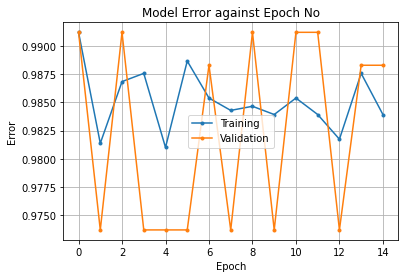

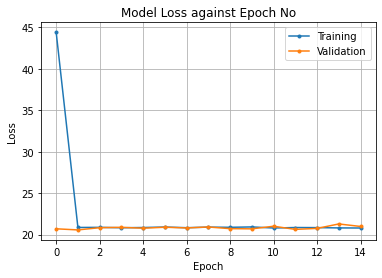

In [4]:
batchsize=16; epoch=15; lr=0.005
net = fullGenSemiA(name='fullGenSemiA_encD'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, inPath="saved/autEncMasked/autEncD")
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

All three models except encoder E showed promise, All with finial training errors below the baseline. Am begining to wonder, if the lables we have are 'categorized' into the discrete numbers of bounding boxes,
can we round the output of the network then use the rounded output as the input into the loss function? Could the loss function then stay MSE, or could it work as Cross Entropy (most likely a classification function without functions like softmax, but still)

Its also noted that the training loops are highly erratic, at once going down to 16, but then going to as high as 20. it's odd.

Note 2: turns out the erratic behavour observed above was due to my evalutaion code, recoded evalutaion doedsn't produce such erratic outputs
Retraining all networks to see which one works the best

### Attempting to see if i can make this into a sudo-classification problem as defined above

Discretising the prediction into the loss function had no effect, further research will need to be conducted if there are loss fucntions fit for this task
For now, the definition of the normal regression adam trainer will be trained to give this definition of accuracy, as it's a different metric than loss.